In [6]:
using ITensors
using Plots
using Random
using Base.Threads

In [2]:
Random.seed!(42)

TaskLocalRNG()

# Attempt at Generative Modelling

In [336]:
mps0_base = load_mps_from_h5("mps0.h5","mps0");
mps1_base = load_mps_from_h5("mps1.h5", "mps1")

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=140|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=708|"Link,l=2"), (dim=2|id=140|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=277|"Link,l=3"), (dim=4|id=708|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=481|"Link,l=4"), (dim=8|id=277|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=749|"Link,l=5"), (dim=15|id=481|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=575|"Link,l=6"), (dim=15|id=749|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=697|"Link,l=7"), (dim=15|id=575|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=946|"Link,l=8"), (dim=15|id=697|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=257|"Link,l=9"), (dim=15|id=946|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=823|"Link,l=10"), (dim=15|id=257|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=858|"Link,l=11"), (dim=15|id=823|"Lin

In [81]:
abs(inner(mps0_base, mps1_base))

6.782373111515784e-16

In [80]:
function complex_feature_map(x::Float64)
    s1 = exp(1im * (3π/2) * x) * cospi(0.5 * x)
    s2 = exp(-1im * (2π/2) * x) * sinpi(0.5 * x)
    return [s1, s2]
end

complex_feature_map (generic function with 1 method)

# Start with Class 0 - Low Freq. Sinusoid

### Step 1 - Get the Reduced Density Matrix At Site 1

In [82]:
mps0_copy = deepcopy(mps0_base)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=268|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=355|"Link,l=2"), (dim=2|id=268|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=773|"Link,l=3"), (dim=4|id=355|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=249|"Link,l=4"), (dim=8|id=773|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=970|"Link,l=5"), (dim=15|id=249|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=58|"Link,l=6"), (dim=15|id=970|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=185|"Link,l=7"), (dim=15|id=58|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=881|"Link,l=8"), (dim=15|id=185|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=133|"Link,l=9"), (dim=15|id=881|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=776|"Link,l=10"), (dim=15|id=133|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=857|"Link,l=11"), (dim=15|id=776|"Link,

In [83]:
s = siteinds(mps0_copy);


Right orthogonalize. Place orthogonality center on site 1. When in this form, the reduced density matrix should be easy to compute.

In [84]:
orthogonalize!(mps0_copy, 1)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=661|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=438|"Link,l=2"), (dim=2|id=661|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=672|"Link,l=3"), (dim=4|id=438|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=864|"Link,l=4"), (dim=8|id=672|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=487|"Link,l=5"), (dim=15|id=864|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=997|"Link,l=6"), (dim=15|id=487|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=709|"Link,l=7"), (dim=15|id=997|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=172|"Link,l=8"), (dim=15|id=709|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=515|"Link,l=9"), (dim=15|id=172|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=530|"Link,l=10"), (dim=15|id=515|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=805|"Link,l=11"), (dim=15|id=530|"Lin

Prime the site indices, contract over the link indices

In [85]:
ρ1 = prime(mps0_copy[1], s[1]) * dag(mps0_copy[1])
ρ1_m = matrix(ρ1)

2×2 Matrix{ComplexF64}:
  0.472331+0.0im       -0.136932+0.127616im
 -0.136932-0.127616im   0.527669+0.0im

Check the trace of the reduced density matrix

In [86]:
real(tr(ρ1_m))

0.9999999999999813

Check adjoint

In [87]:
isequal(adjoint(ρ1).tensor, ρ1.tensor)

true

Construct probe states over the rage of values to get the probability distribution.

In [88]:
complex_feature_map(0.6)' * ρ1_m * complex_feature_map(0.6)

0.38718010674680503 + 8.460190857778345e-18im

In [89]:
real(complex_feature_map(0.6)' * ρ1_m * complex_feature_map(0.6))

0.38718010674680503

In [92]:
xs = 0.0:0.01:1.0
probs = [abs(complex_feature_map(x)' * ρ1_m * complex_feature_map(x)) for x in xs];
probs_normed = probs ./ sum(probs);

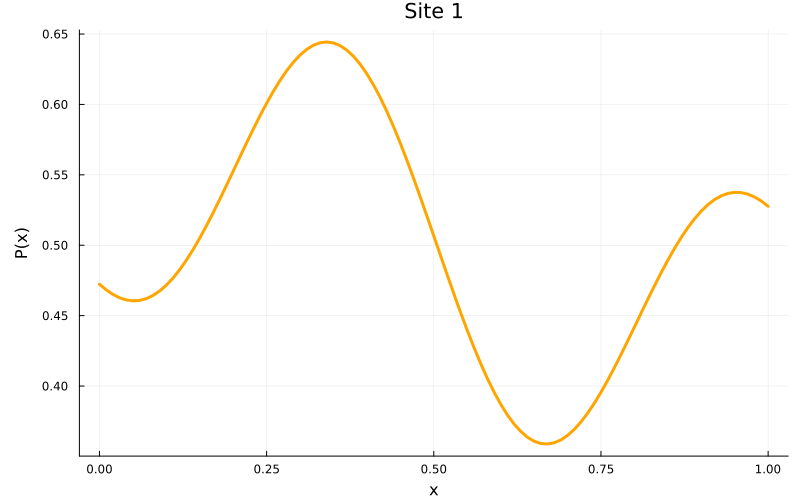

In [93]:
plot(xs, probs, label="", title="Site 1", c=:orange, lw=3, xlabel="x", ylabel="P(x)", 
    size=(800, 500), left_margin=5mm)

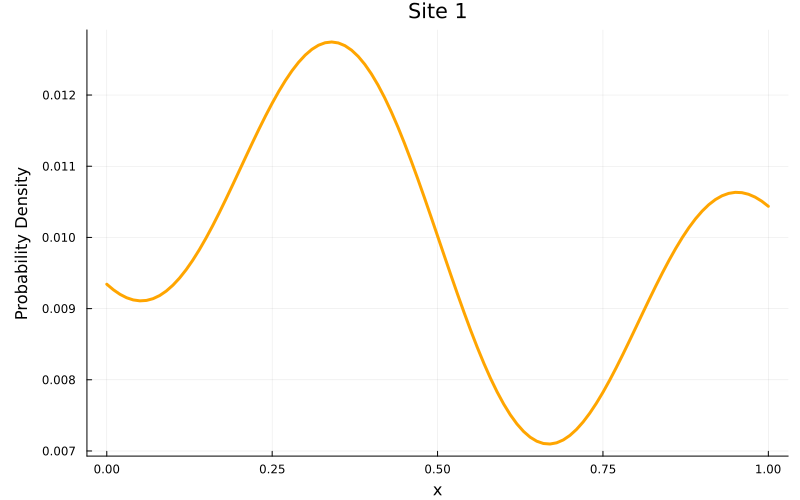

In [419]:
plot(xs, probs_normed, label="", title="Site 1", c=:orange, lw=3, xlabel="x", ylabel="Probability Density", size=(800, 500), left_margin=5mm)

Compute the cumulative distribution function (CDF) so we can use inverse transform sampling to sample a random value from this distribution. 

In [420]:
cdf_site_1 = cumsum(probs_normed);

Now generate a random value from the uniform distribution $U \sim (0,1)$

In [421]:
rand_val_site_1 = rand()

0.6293451231426089

In [422]:
findfirst(x -> x .> rand_val_site_1, cdf_site_1)

59

In [423]:
cdf_site_1[59]

0.6300291765818546

So the state in index 59 is our sampled state.

In [424]:
xs[59]

0.58

Let's convert this back to a quantum state for our projective measurement. We will first construct our projector and then convert it to a local (1-site) MPO that we can apply at the first site of our MPS to make the measurment.  

In [425]:
site_1_measured_state = ITensor(complex_feature_map(xs[59]), s[1])
site_1_measured_state.tensor

Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2-element
  -0.5624982836043592 + 0.24341474351345824im
 -0.19650356087045473 - 0.7653308396684788im

ITensor can only make projectors using MPS's, so we will have to convert our single ITensor to a 1 site MPS.

In [426]:
m = MPS(1)
m[1] = site_1_measured_state
m[1].tensor

Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2-element
  -0.5624982836043592 + 0.24341474351345824im
 -0.19650356087045473 - 0.7653308396684788im

In [427]:
site_1_projector = projector(m)

MPO
[1] ((dim=2|id=688|"S=1/2,Site,n=1")', (dim=2|id=688|"S=1/2,Site,n=1"))


In [428]:
site_1_projector[1].tensor

Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")'
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
  0.3756550564175727 - 4.30822093388717e-18im  …  -0.0757598943290669 - 0.4783291475717653im
 -0.0757598943290669 + 0.4783291475717653im        0.6243449435824273 - 4.485067025744171e-18im

Double check the trace and Hermitian properties. 

In [429]:
adjoint(site_1_projector[1]).tensor

Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")''
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")'
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
  0.3756550564175727 - 4.30822093388717e-18im  …  -0.0757598943290669 - 0.4783291475717653im
 -0.0757598943290669 + 0.4783291475717653im        0.6243449435824273 - 4.485067025744171e-18im

In [430]:
site_1_projector_operator = op(matrix(site_1_projector[1]), s[1])

ITensor ord=2 (dim=2|id=688|"S=1/2,Site,n=1")' (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [431]:
@show site_1_projector_operator

site_1_projector_operator = ITensor ord=2
Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")'
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
  0.3756550564175727 - 4.30822093388717e-18im  -0.0757598943290669 - 0.4783291475717653im
 -0.0757598943290669 + 0.4783291475717653im     0.6243449435824273 - 4.485067025744171e-18im


ITensor ord=2 (dim=2|id=688|"S=1/2,Site,n=1")' (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

Contract projector with site 1 to get the new state.

In [432]:
site_1_before_projecting = deepcopy(mps0_copy[1])
site_1_before_projecting.tensor

Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")
Dim 2: (dim=2|id=558|"Link,l=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 -0.5424158830743943 + 1.216454409312434e-15im  …  0.4220383245782994 + 2.69377426934602e-17im
  0.4597738228554376 + 0.42849339755912363im       0.2664606096733817 + 0.24833212827456239im

In [433]:
site_1_after_projecting = site_1_before_projecting * site_1_projector_operator
noprime!(site_1_after_projecting)
site_1_after_projecting.tensor

Dim 1: (dim=2|id=558|"Link,l=1")
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 -0.033632803798313016 - 0.2523858352820349im   …   0.3281508314754782 + 0.008074359144132182im
    0.2571382982303785 - 0.14626949208311468im     0.13438975544059825 + 0.3569181406554397im

Put new site back into MPS

In [434]:
mps0_copy[1] = site_1_after_projecting
normalize!(mps0_copy);

In [435]:
norm(mps0_copy)

0.9999999999999999

# Site 2, Conditional upon Site 1

Shift orthogonality center to site 2 and repeat the above process...

In [436]:
orthogonalize!(mps0_copy, 2);

Check trace and is Hermitian

In [437]:
ρ2 = prime(mps0_copy[2], s[2]) * dag(mps0_copy[2]);
tr(ρ2)
#ρ2 = matrix(ρ2)

0.9999999999999999 + 3.3585270166587865e-18im

In [438]:
isequal(ρ2.tensor, adjoint(ρ2).tensor)

true

In [439]:
ρ2_m = matrix(ρ2)

2×2 Matrix{ComplexF64}:
  0.607658-1.91781e-18im  -0.238643-0.00432325im
 -0.238643+0.00432325im    0.392342+5.27634e-18im

In [440]:
complex_feature_map(0.1)

2-element Vector{ComplexF64}:
  0.8800367553350505 + 0.44840112333371024im
 0.14877801734965795 - 0.04834090820338493im

In [441]:
probs_site2_given_site1 = [abs(complex_feature_map(x)' * ρ2_m * complex_feature_map(x)) for x in xs];
probs_site2_given_site1_normed = probs_site2_given_site1 / sum(probs_site2_given_site1);

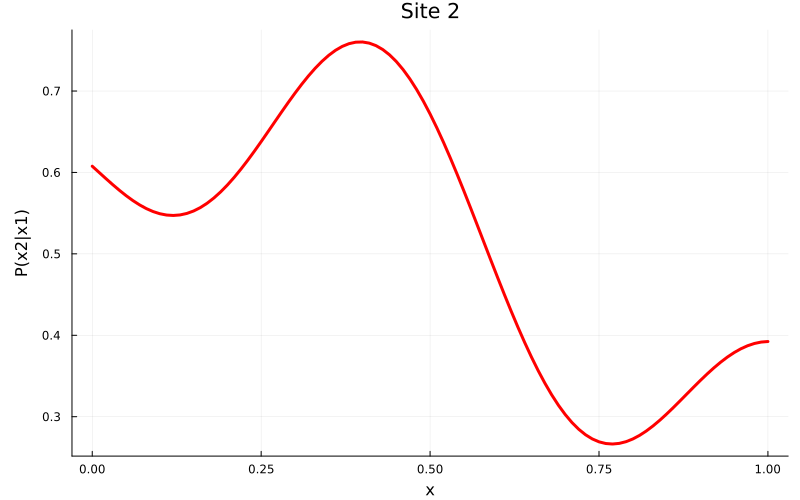

In [442]:
plot(xs, probs_site2_given_site1, label="", title="Site 2", c=:red, lw=3, xlabel="x", ylabel="P(x2|x1)", 
    size=(800, 500), left_margin=5mm)

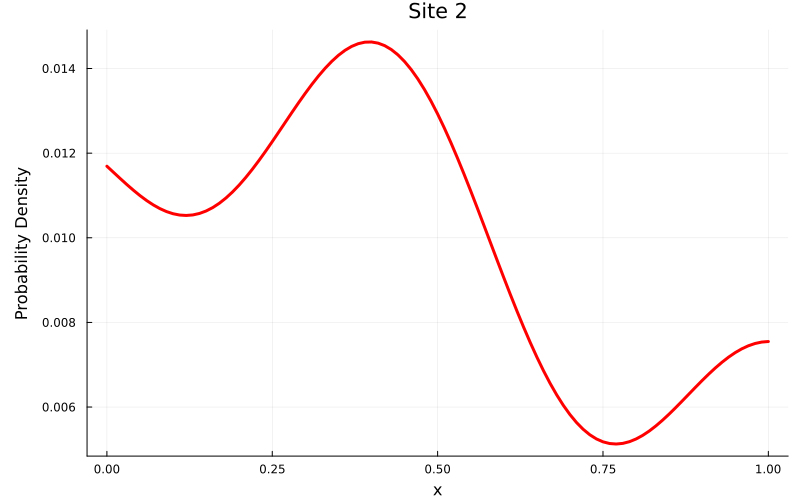

In [445]:
plot(xs, probs_site2_given_site1_normed, label="", title="Site 2", c=:red, lw=3, xlabel="x", ylabel="Probability Density", 
    size=(800, 500), left_margin=5mm)

In [447]:
cdf_site_2 = cumsum(probs_site2_given_site1_normed);

In [448]:
rand_val_site_2 = rand()

0.4503389405961936

In [456]:
findfirst(x -> x .> rand_val_site_2, cdf_site_2)


38

In [458]:
site_2_measured_state = ITensor(complex_feature_map(xs[38]), s[2])
site_2_measured_state.tensor

Dim 1: (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2-element
 -0.1436996076469539 + 0.8233616265526964im
 0.21804325407832104 - 0.5038682308238398im

# Entire MPS

In [155]:
include("utils.jl");
include("real_complex_final.jl");

In [130]:
(X_train, y_train), (X_test, y_test) = generate_toy_timeseries(100, 5000; plot_examples=false);

In [131]:
scaler = fitScaler(RobustSigmoidTransform, X_train; positive=true)
X_train_scaled = transformData(scaler, X_train);

In [136]:
class_0_idxs = findall(x -> x .== 0, y_train);
class_1_idxs = findall(x -> x .== 1, y_train);

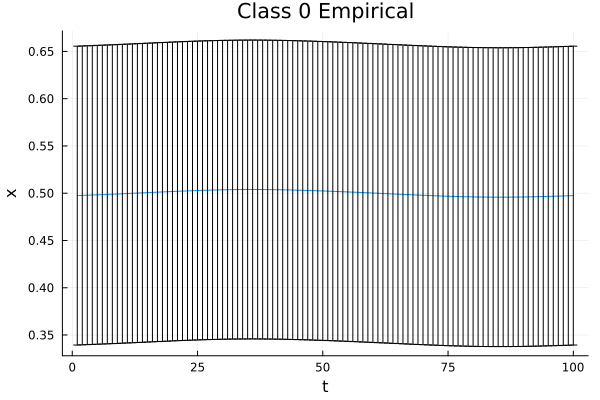

In [528]:
plot(mean(X_train_scaled[class_0_idxs, :], dims=1)[1,:], title="Class 0 Empirical",
    yerr=std(X_train_scaled[class_0_idxs, :], dims=1), label="", xlabel="t", ylabel="x")
#savefig("figs/Class_0_empirical.svg")

In [531]:
mps0_base = load_mps_from_h5("mps0.h5","mps0");
mps1_base = load_mps_from_h5("mps1.h5", "mps1");

In [532]:
mps0_individual_samples = Matrix{Float64}(undef, 5000, 100);

In [533]:
@threads for i in 1:5000
    mps0_individual_samples[i, :] = generate_sample(deepcopy(mps0_base); dx=0.01)
end

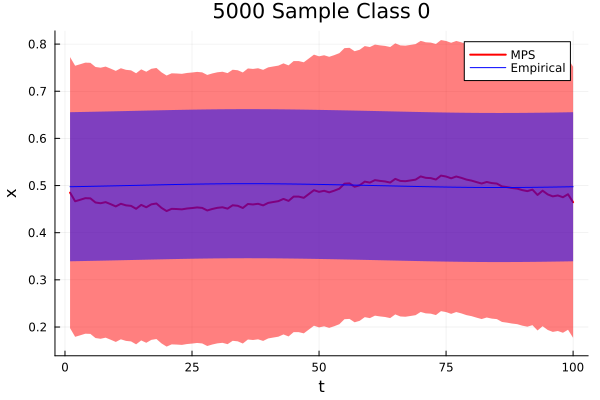

In [548]:
plot(mean(mps0_individual_samples, dims=1)[1,:], label="MPS", xlabel="t", ylabel="x", title="5000 Sample Class 0", lw=2, 
    c=:red, ribbon=std(mps0_individual_samples, dims=1))
plot!(mean(X_train_scaled[class_0_idxs, :], dims=1)[1,:], ribbon=std(X_train_scaled[class_0_idxs, :], dims=1), label="Empirical", 
    color="blue")
#savefig("figs/class0_5000_empirical_versus_actual.svg")

In [549]:
mps1_individual_samples = Matrix{Float64}(undef, 5000, 100);

In [550]:
@threads for i in 1:5000
    mps1_individual_samples[i, :] = generate_sample(deepcopy(mps1_base); dx=0.01)
end

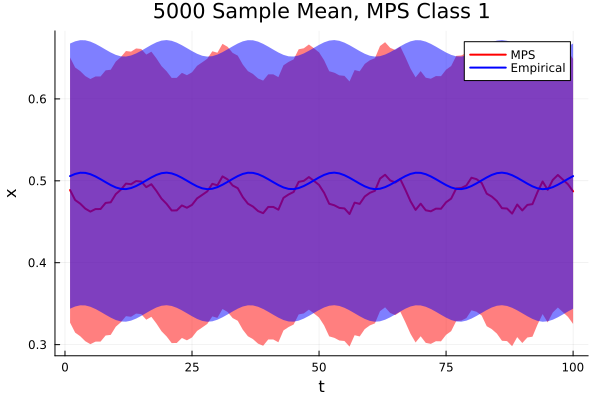

In [559]:
plot(mean(mps1_individual_samples, dims=1)[1,:], ribbon=std(X_train_scaled[class_1_idxs, :], dims=1), label="MPS", xlabel="t", ylabel="x", title="5000 Sample Mean, MPS Class 1", lw=2, 
    c=:red)
plot!(mean(X_train_scaled[class_1_idxs, :], dims=1)[1,:], ribbon=std(X_train_scaled[class_1_idxs, :], dims=1), label="Empirical", 
    color="blue", lw=2)
#savefig("figs/class1_5000_mps_v_empiricial.svg")

# Forecasting

Imputation trial. Here the goal is to supply 50% of the time series data, condition the MPS on these measurements using projective measurments at the corresponding sites, then sample the remaining sites from the conditional probability distribution. 

In [492]:
mps0_base = load_mps_from_h5("mps0.h5","mps0");
mps1_base = load_mps_from_h5("mps1.h5", "mps1");

In [439]:
class_0_idxs[1]

3

This is what we will feed into the MPS - the first 50 data points. Then, we will sample the remaining 50 points.

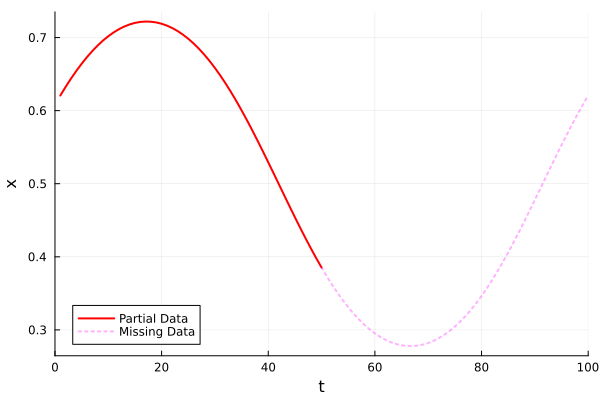

In [440]:
plot(1:50, X_train_scaled[3,1:50], xlimits=(0, 100), label="Partial Data", lw=2, c=:red, xlabel="t", ylabel="x")
plot!(50:100, X_train_scaled[3,50:end], xlimits=(0, 100), label="Missing Data", lw=2, ls=:dot, alpha=0.3, c=:magenta)

In [441]:
X_train_scaled[3,1]

0.6206496445533926

Condition the class 0 MPS on the first site. 

In [442]:
complex_feature_map(X_train_scaled[3,1])

2-element Vector{ComplexF64}:
  -0.5480948676786046 + 0.12075315582078987im
 -0.30624957642026257 - 0.7689095449570792im

In [443]:
mps0_base;

Make projector

In [444]:
(-0.30624957642026257 - 0.7689095449570792im) * (-0.5480948676786046 - 0.12075315582078987im)

0.0750055669703977 + 0.4584159781215933im

In [445]:
site_1 = ITensor(complex_feature_map(X_train_scaled[3,1]), s[1])

ITensor ord=1 (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [446]:
m = MPS(1)

MPS
#undef


In [447]:
m[1] = site_1

ITensor ord=1 (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [448]:
site_projector = projector(m)

MPO
[1] ((dim=2|id=688|"S=1/2,Site,n=1")', (dim=2|id=688|"S=1/2,Site,n=1"))


In [449]:
@show site_projector[1]

site_projector[1] = ITensor ord=2
Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")'
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
  0.3149893086163071 - 4.764599847259948e-18im  0.07500556697039772 - 0.4584159781215934im
 0.07500556697039772 + 0.45841597812159335im      0.685010691383693 + 6.318245952068659e-18im


ITensor ord=2 (dim=2|id=688|"S=1/2,Site,n=1")' (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [450]:
site_projector_operator = op(matrix(site_projector[1]), s[1])

ITensor ord=2 (dim=2|id=688|"S=1/2,Site,n=1")' (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [451]:
@show site_projector_operator

site_projector_operator = ITensor ord=2
Dim 1: (dim=2|id=688|"S=1/2,Site,n=1")'
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
  0.3149893086163071 - 4.764599847259948e-18im  0.07500556697039772 - 0.4584159781215934im
 0.07500556697039772 + 0.45841597812159335im      0.685010691383693 + 6.318245952068659e-18im


ITensor ord=2 (dim=2|id=688|"S=1/2,Site,n=1")' (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [452]:
orthogonalize!(mps0_base, 1)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=586|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=465|"Link,l=2"), (dim=2|id=586|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=429|"Link,l=3"), (dim=4|id=465|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=751|"Link,l=4"), (dim=8|id=429|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=85|"Link,l=5"), (dim=15|id=751|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=467|"Link,l=6"), (dim=15|id=85|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=515|"Link,l=7"), (dim=15|id=467|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=132|"Link,l=8"), (dim=15|id=515|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=558|"Link,l=9"), (dim=15|id=132|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=783|"Link,l=10"), (dim=15|id=558|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=751|"Link,l=11"), (dim=15|id=783|"Link,

In [453]:
mps0_base[1] *= site_projector_operator

ITensor ord=2 (dim=2|id=586|"Link,l=1") (dim=2|id=688|"S=1/2,Site,n=1")'
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [454]:
noprime!(mps0_base[1])

ITensor ord=2 (dim=2|id=586|"Link,l=1") (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [455]:
@show mps0_base[1]

mps0_base[1] = ITensor ord=2
Dim 1: (dim=2|id=586|"Link,l=1")
Dim 2: (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 0.06005861223002265 - 0.17862827649198515im  0.27426577343058245 + 0.04487045092708672im
 0.26676300465433345 - 0.1035235089361003im   0.21418359027711562 + 0.3635792742485015im


ITensor ord=2 (dim=2|id=586|"Link,l=1") (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [456]:
normalize!(mps0_base)

MPS
[1] ((dim=2|id=586|"Link,l=1"), (dim=2|id=688|"S=1/2,Site,n=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=465|"Link,l=2"), (dim=2|id=586|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=429|"Link,l=3"), (dim=4|id=465|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=751|"Link,l=4"), (dim=8|id=429|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=85|"Link,l=5"), (dim=15|id=751|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=467|"Link,l=6"), (dim=15|id=85|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=515|"Link,l=7"), (dim=15|id=467|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=132|"Link,l=8"), (dim=15|id=515|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=558|"Link,l=9"), (dim=15|id=132|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=783|"Link,l=10"), (dim=15|id=558|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=751|"Link,l=11"), (dim=15|id=783|"Link,

In [457]:
norm(mps0_base)

1.0

Check the first site to see if we conditioned it properly. When we get the RDM at site 1, we should expect 100% probability of getting the value of the first site we conditioned it using i.e., $\langle r| \rho | r \rangle = 1$.

In [458]:
orthogonalize!(mps0_base, 1)

MPS
[1] ((dim=2|id=586|"Link,l=1"), (dim=2|id=688|"S=1/2,Site,n=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=465|"Link,l=2"), (dim=2|id=586|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=429|"Link,l=3"), (dim=4|id=465|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=751|"Link,l=4"), (dim=8|id=429|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=85|"Link,l=5"), (dim=15|id=751|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=467|"Link,l=6"), (dim=15|id=85|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=515|"Link,l=7"), (dim=15|id=467|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=132|"Link,l=8"), (dim=15|id=515|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=558|"Link,l=9"), (dim=15|id=132|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=783|"Link,l=10"), (dim=15|id=558|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=751|"Link,l=11"), (dim=15|id=783|"Link,

In [459]:
ρ1 = prime(mps0_base[1], s[1]) * dag(mps0_base[1])

ITensor ord=2 (dim=2|id=688|"S=1/2,Site,n=1")' (dim=2|id=688|"S=1/2,Site,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [460]:
adjoint(complex_feature_map(X_train_scaled[3,1])) * matrix(ρ1) * complex_feature_map(X_train_scaled[3,1])

0.9999999999999998 + 3.407382156769757e-17im

Okay checks out... Now let's project site 2.

In [461]:
site_2 = ITensor(complex_feature_map(X_train_scaled[3,2]), s[2])

ITensor ord=1 (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [462]:
m = MPS(1)
m[1] = site_2
site_projector = projector(m)
@show site_projector[1]

site_projector[1] = ITensor ord=2
Dim 1: (dim=2|id=808|"S=1/2,Site,n=2")'
Dim 2: (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 0.29775944247880404 - 9.321492073781005e-19im  0.11562394117493094 - 0.4424136764620777im
 0.11562394117493094 + 0.4424136764620777im       0.702240557521196 - 4.478336943285623e-18im


ITensor ord=2 (dim=2|id=808|"S=1/2,Site,n=2")' (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [463]:
orthogonalize!(mps0_base, 2)#

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=437|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=465|"Link,l=2"), (dim=2|id=437|"Link,l=1"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=429|"Link,l=3"), (dim=4|id=465|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=751|"Link,l=4"), (dim=8|id=429|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=85|"Link,l=5"), (dim=15|id=751|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=467|"Link,l=6"), (dim=15|id=85|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=515|"Link,l=7"), (dim=15|id=467|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=132|"Link,l=8"), (dim=15|id=515|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=558|"Link,l=9"), (dim=15|id=132|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=783|"Link,l=10"), (dim=15|id=558|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=751|"Link,l=11"), (dim=15|id=783|"Link,

In [464]:
site_projector_operator = op(matrix(site_projector[1]), s[2])
@show site_projector_operator

site_projector_operator = ITensor ord=2
Dim 1: (dim=2|id=808|"S=1/2,Site,n=2")'
Dim 2: (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 0.29775944247880404 - 9.321492073781005e-19im  0.11562394117493094 - 0.4424136764620777im
 0.11562394117493094 + 0.4424136764620777im       0.702240557521196 - 4.478336943285623e-18im


ITensor ord=2 (dim=2|id=808|"S=1/2,Site,n=2")' (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [480]:
@show site_projector_operator

site_projector_operator = ITensor ord=2
Dim 1: (dim=2|id=808|"S=1/2,Site,n=2")'
Dim 2: (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 0.29775944247880404 - 9.321492073781005e-19im  0.11562394117493094 - 0.4424136764620777im
 0.11562394117493094 + 0.4424136764620777im       0.702240557521196 - 4.478336943285623e-18im


ITensor ord=2 (dim=2|id=808|"S=1/2,Site,n=2")' (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [482]:
isequal(adjoint(site_projector_operator).tensor, site_projector_operator.tensor)

true

In [465]:
mps0_base[2] *= site_projector_operator
noprime!(mps0_base[2])

ITensor ord=3 (dim=4|id=465|"Link,l=2") (dim=2|id=437|"Link,l=1") (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [466]:
normalize!(mps0_base)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=437|"Link,l=1"))
[2] ((dim=4|id=465|"Link,l=2"), (dim=2|id=437|"Link,l=1"), (dim=2|id=808|"S=1/2,Site,n=2"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=429|"Link,l=3"), (dim=4|id=465|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=751|"Link,l=4"), (dim=8|id=429|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=85|"Link,l=5"), (dim=15|id=751|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=467|"Link,l=6"), (dim=15|id=85|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=515|"Link,l=7"), (dim=15|id=467|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=132|"Link,l=8"), (dim=15|id=515|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=558|"Link,l=9"), (dim=15|id=132|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=783|"Link,l=10"), (dim=15|id=558|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=751|"Link,l=11"), (dim=15|id=783|"Link,

Double check this site as well. 

In [467]:
orthogonalize!(mps0_base, 2)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=437|"Link,l=1"))
[2] ((dim=4|id=465|"Link,l=2"), (dim=2|id=437|"Link,l=1"), (dim=2|id=808|"S=1/2,Site,n=2"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=429|"Link,l=3"), (dim=4|id=465|"Link,l=2"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=751|"Link,l=4"), (dim=8|id=429|"Link,l=3"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=85|"Link,l=5"), (dim=15|id=751|"Link,l=4"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=467|"Link,l=6"), (dim=15|id=85|"Link,l=5"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=515|"Link,l=7"), (dim=15|id=467|"Link,l=6"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=132|"Link,l=8"), (dim=15|id=515|"Link,l=7"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=558|"Link,l=9"), (dim=15|id=132|"Link,l=8"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=783|"Link,l=10"), (dim=15|id=558|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=751|"Link,l=11"), (dim=15|id=783|"Link,

In [468]:
ρ2 = prime(mps0_base[2], s[2]) * dag(mps0_base[2])

ITensor ord=2 (dim=2|id=808|"S=1/2,Site,n=2")' (dim=2|id=808|"S=1/2,Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [470]:
adjoint(complex_feature_map(X_train_scaled[3,2])) * matrix(ρ2) * complex_feature_map(X_train_scaled[3,2])

1.0 + 2.5096668103650447e-17im

In [506]:
include("utils.jl");

In [507]:
out = interpolate_sample(mps0_base, X_train_scaled[3,1:50], 51)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=643|"Link,l=1"))
[2] ((dim=2|id=643|"Link,l=1"), (dim=2|id=808|"S=1/2,Site,n=2"), (dim=4|id=858|"Link,l=2"))
[3] ((dim=4|id=858|"Link,l=2"), (dim=2|id=863|"S=1/2,Site,n=3"), (dim=8|id=457|"Link,l=3"))
[4] ((dim=8|id=457|"Link,l=3"), (dim=2|id=683|"S=1/2,Site,n=4"), (dim=15|id=567|"Link,l=4"))
[5] ((dim=15|id=567|"Link,l=4"), (dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=461|"Link,l=5"))
[6] ((dim=15|id=461|"Link,l=5"), (dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=481|"Link,l=6"))
[7] ((dim=15|id=481|"Link,l=6"), (dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=917|"Link,l=7"))
[8] ((dim=15|id=917|"Link,l=7"), (dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=869|"Link,l=8"))
[9] ((dim=15|id=869|"Link,l=8"), (dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=579|"Link,l=9"))
[10] ((dim=15|id=579|"Link,l=9"), (dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=627|"Link,l=10"))
[11] ((dim=15|id=627|"Link,l=10"), (dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=254|"Lin

Probe site 1

In [512]:
orthogonalize!(out, 10)

MPS
[1] ((dim=2|id=688|"S=1/2,Site,n=1"), (dim=2|id=497|"Link,l=1"))
[2] ((dim=2|id=808|"S=1/2,Site,n=2"), (dim=2|id=497|"Link,l=1"), (dim=4|id=771|"Link,l=2"))
[3] ((dim=2|id=863|"S=1/2,Site,n=3"), (dim=4|id=771|"Link,l=2"), (dim=8|id=168|"Link,l=3"))
[4] ((dim=2|id=683|"S=1/2,Site,n=4"), (dim=8|id=168|"Link,l=3"), (dim=15|id=947|"Link,l=4"))
[5] ((dim=2|id=46|"S=1/2,Site,n=5"), (dim=15|id=947|"Link,l=4"), (dim=15|id=110|"Link,l=5"))
[6] ((dim=2|id=106|"S=1/2,Site,n=6"), (dim=15|id=110|"Link,l=5"), (dim=15|id=315|"Link,l=6"))
[7] ((dim=2|id=354|"S=1/2,Site,n=7"), (dim=15|id=315|"Link,l=6"), (dim=15|id=587|"Link,l=7"))
[8] ((dim=2|id=245|"S=1/2,Site,n=8"), (dim=15|id=587|"Link,l=7"), (dim=15|id=767|"Link,l=8"))
[9] ((dim=2|id=811|"S=1/2,Site,n=9"), (dim=15|id=767|"Link,l=8"), (dim=15|id=369|"Link,l=9"))
[10] ((dim=2|id=710|"S=1/2,Site,n=10"), (dim=15|id=247|"Link,l=10"), (dim=15|id=369|"Link,l=9"))
[11] ((dim=2|id=436|"S=1/2,Site,n=11"), (dim=15|id=408|"Link,l=11"), (dim=15|id=247|"Lin

In [513]:
ρ10 = prime(out[10], s[10]) * dag(out[10])

ITensor ord=2 (dim=2|id=710|"S=1/2,Site,n=10")' (dim=2|id=710|"S=1/2,Site,n=10")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [514]:
@show ρ10

ρ10 = ITensor ord=2
Dim 1: (dim=2|id=710|"S=1/2,Site,n=10")'
Dim 2: (dim=2|id=710|"S=1/2,Site,n=10")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 0.20378426394158958 - 3.029500868935839e-18im  0.2888984282269354 - 0.28070257547692723im
  0.2888984282269354 + 0.28070257547692723im    0.7962157360584087 - 1.864099647540734e-17im


ITensor ord=2 (dim=2|id=710|"S=1/2,Site,n=10")' (dim=2|id=710|"S=1/2,Site,n=10")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

Now check probability of site 10 being the value its supposedly conditioned on...

In [595]:
mps0_base = load_mps_from_h5("mps0.h5","mps0");

In [594]:
include("utils.jl")

interpolate_sample (generic function with 1 method)

In [616]:
class_0_idxs

1669-element Vector{Int64}:
    3
    4
    5
    8
    9
   10
   12
   14
   15
   16
    ⋮
 3470
 3472
 3475
 3477
 3480
 3489
 3493
 3497
 3498

In [613]:
samps = Matrix{Any}(undef, 5000, 50)
@threads for i in 1:5000
    individual_sample = interpolate_sample(deepcopy(mps0_base), X_train_scaled[3498,1:50], 51)
    samps[i, :] = individual_sample
end


In [614]:
mean(samps, dims=1)

1×50 Matrix{Float64}:
 0.6372  0.6288  0.6224  0.5948  0.5858  …  0.339  0.3398  0.3414  0.3512

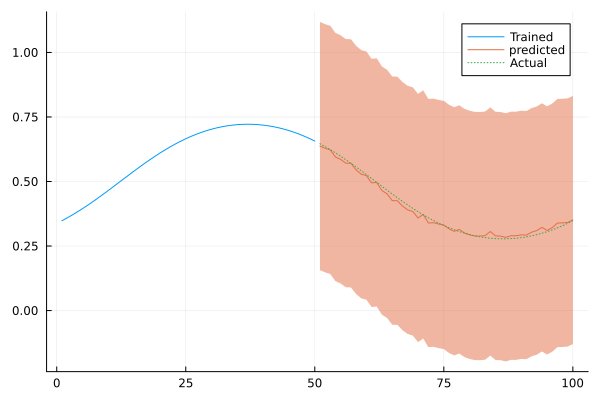

In [615]:
plot(collect(1:50), X_train_scaled[3498,1:50], label="Trained")
plot!(collect(51:100), mean(samps, dims=1)[1, :], ribbon=std(samps, dims=1), label="predicted")
plot!(collect(51:100), X_train_scaled[3498, 51:end], label="Actual", ls=:dot)

In [636]:
mps0_base = load_mps_from_h5("mps0.h5","mps0");
mps1_base = load_mps_from_h5("mps1.h5","mps1");

In [637]:
samps2 = Matrix{Any}(undef, 5000, 50)
@threads for i in 1:5000
    individual_sample = interpolate_sample(deepcopy(mps1_base), X_train_scaled[17,1:50], 51)
    samps2[i, :] = individual_sample
end

In [641]:
#mean(samps2, dims=1)

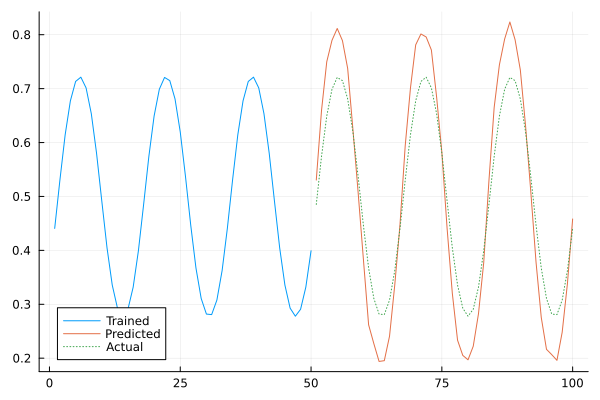

In [646]:
plot(collect(1:50), X_train_scaled[17,1:50], label="Trained")
plot!(collect(51:100), mean(samps2, dims=1)[1, :], label="Predicted")
plot!(collect(51:100), X_train_scaled[17, 51:end], label="Actual", ls=:dot)

In [659]:
samps3 = Matrix{Any}(undef, 5000, 50)
@threads for i in 1:5000
    individual_sample = interpolate_sample(deepcopy(mps1_base), X_train_scaled[15,1:50], 51)
    samps3[i, :] = individual_sample
end

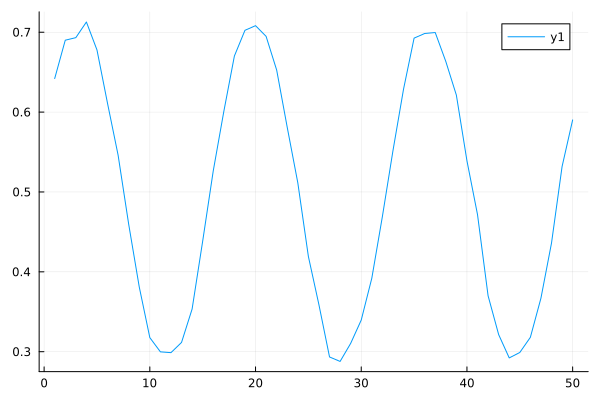

In [666]:
plot(mean(samps3, dims=1)[1, :])

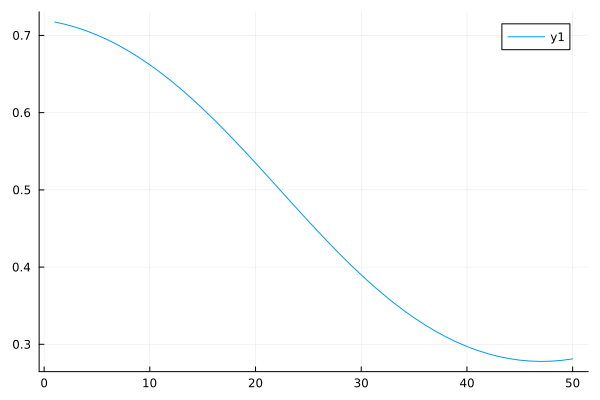

In [662]:
plot(collect(1:50), X_train_scaled[15, 1:50])

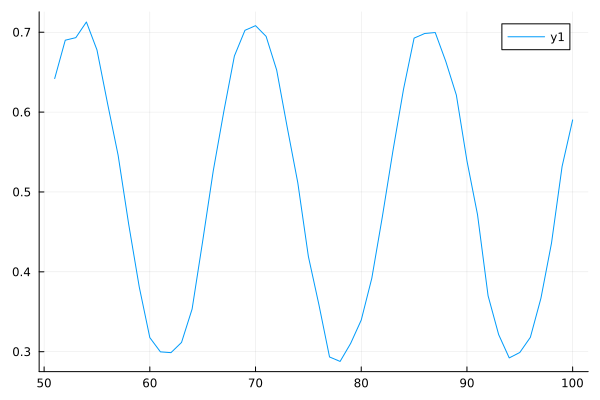

In [661]:
#plot(collect(1:50), X_train_scaled[3491,1:50], label="Trained")
plot(collect(51:100), mean(samps3, dims=1)[1,:])